In [ ]:
from google.colab import files
uploaded = files.upload()

Saving usgs-83PSfuiPoEs-unsplash (2).jpg to usgs-83PSfuiPoEs-unsplash (2).jpg


In [ ]:
image_path = list(uploaded.keys())[0]
print(image_path)

usgs-83PSfuiPoEs-unsplash (2).jpg


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

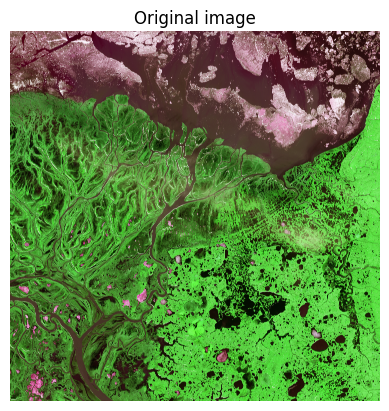

In [ ]:
image=cv2.imread(image_path)
plt.axis('off')
plt.imshow(image)
plt.title('Original image')
plt.show()

In [ ]:
img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

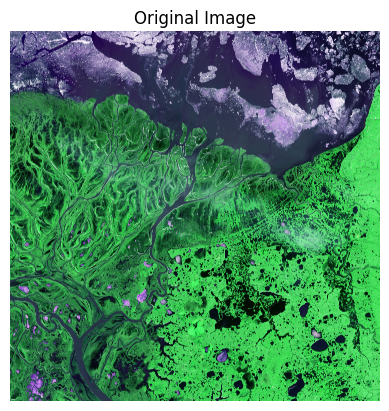

In [ ]:
plt.axis('off')
plt.imshow(img)
plt.title('Original Image')
plt.show()

In [ ]:
img.shape

(7215, 7215, 3)

In [ ]:
vectorized_img = np.float32(img.reshape((-1,3)))
vectorized_img.shape

(52056225, 3)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

In [ ]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [ ]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

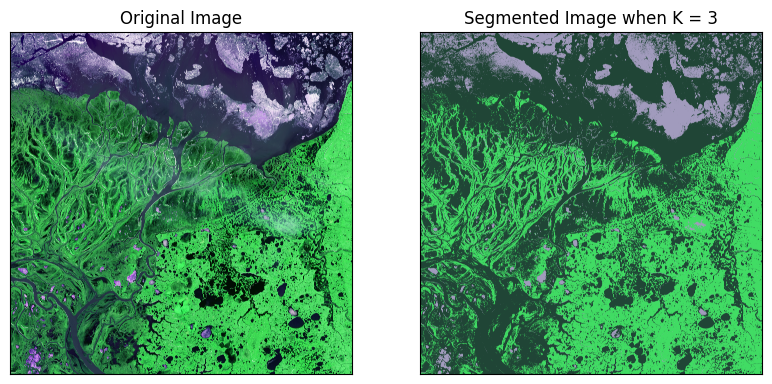

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(2,3,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

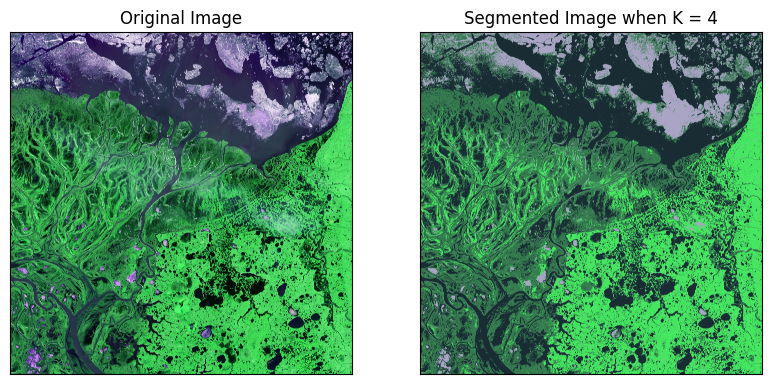

In [ ]:
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(2,3,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
n_components = 3  # Number of color clusters
gmm = GaussianMixture(n_components=n_components)
gmm.fit(vectorized_img)
labels = gmm.predict(vectorized_img)
segmented_image = labels.reshape(img.shape[:2])


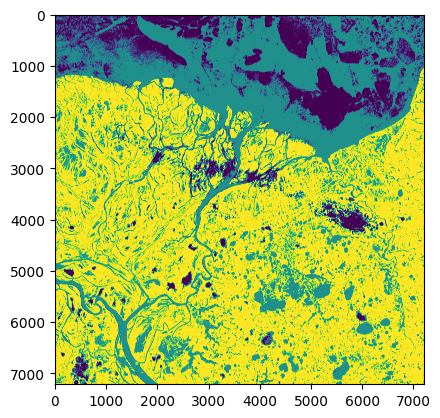

In [ ]:
plt.imshow(segmented_image)
plt.show()

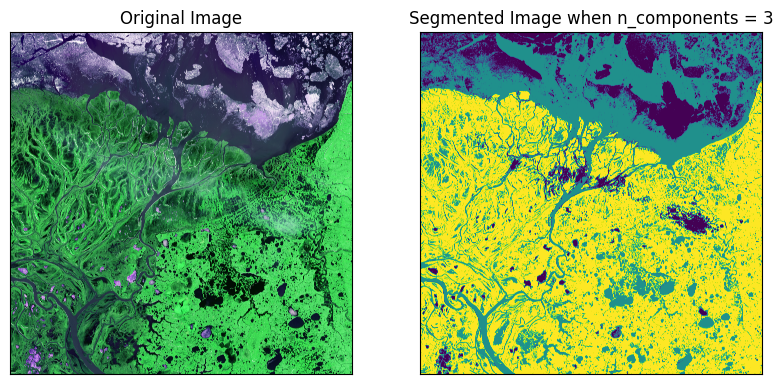

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(2,3,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(segmented_image)
plt.title('Segmented Image when n_components = %i' % n_components), plt.xticks([]), plt.yticks([])
plt.show()